<a href="https://colab.research.google.com/github/RachidNaitSaid2002/Image-Classification-Deep-Learning/blob/main/BRF3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# importation libs
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

#Bonus
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [37]:
# Inspecter dimensions, classes.
print(f"x_train chap :{x_train.shape}")
print(f"y_train chap :{y_train.shape}")
print(f"x_test chap :{x_test.shape}")
print(f"y_test chap :{y_test.shape}")

unique_labels = np.unique(y_train)
print(f"Nombre de classes : {len(unique_labels)}")
print(f"classes est: {unique_labels}")

x_train chap :(60000, 28, 28)
y_train chap :(60000,)
x_test chap :(10000, 28, 28)
y_test chap :(10000,)
Nombre de classes : 10
classes est: [0 1 2 3 4 5 6 7 8 9]


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

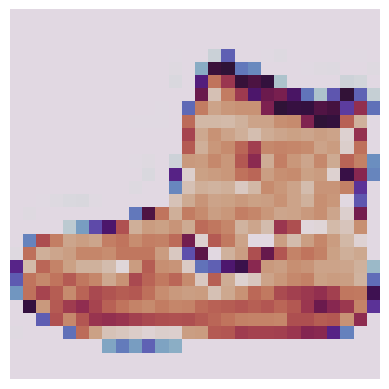

In [38]:
plt.imshow(x_train[0],cmap='twilight')
plt.axis('off')

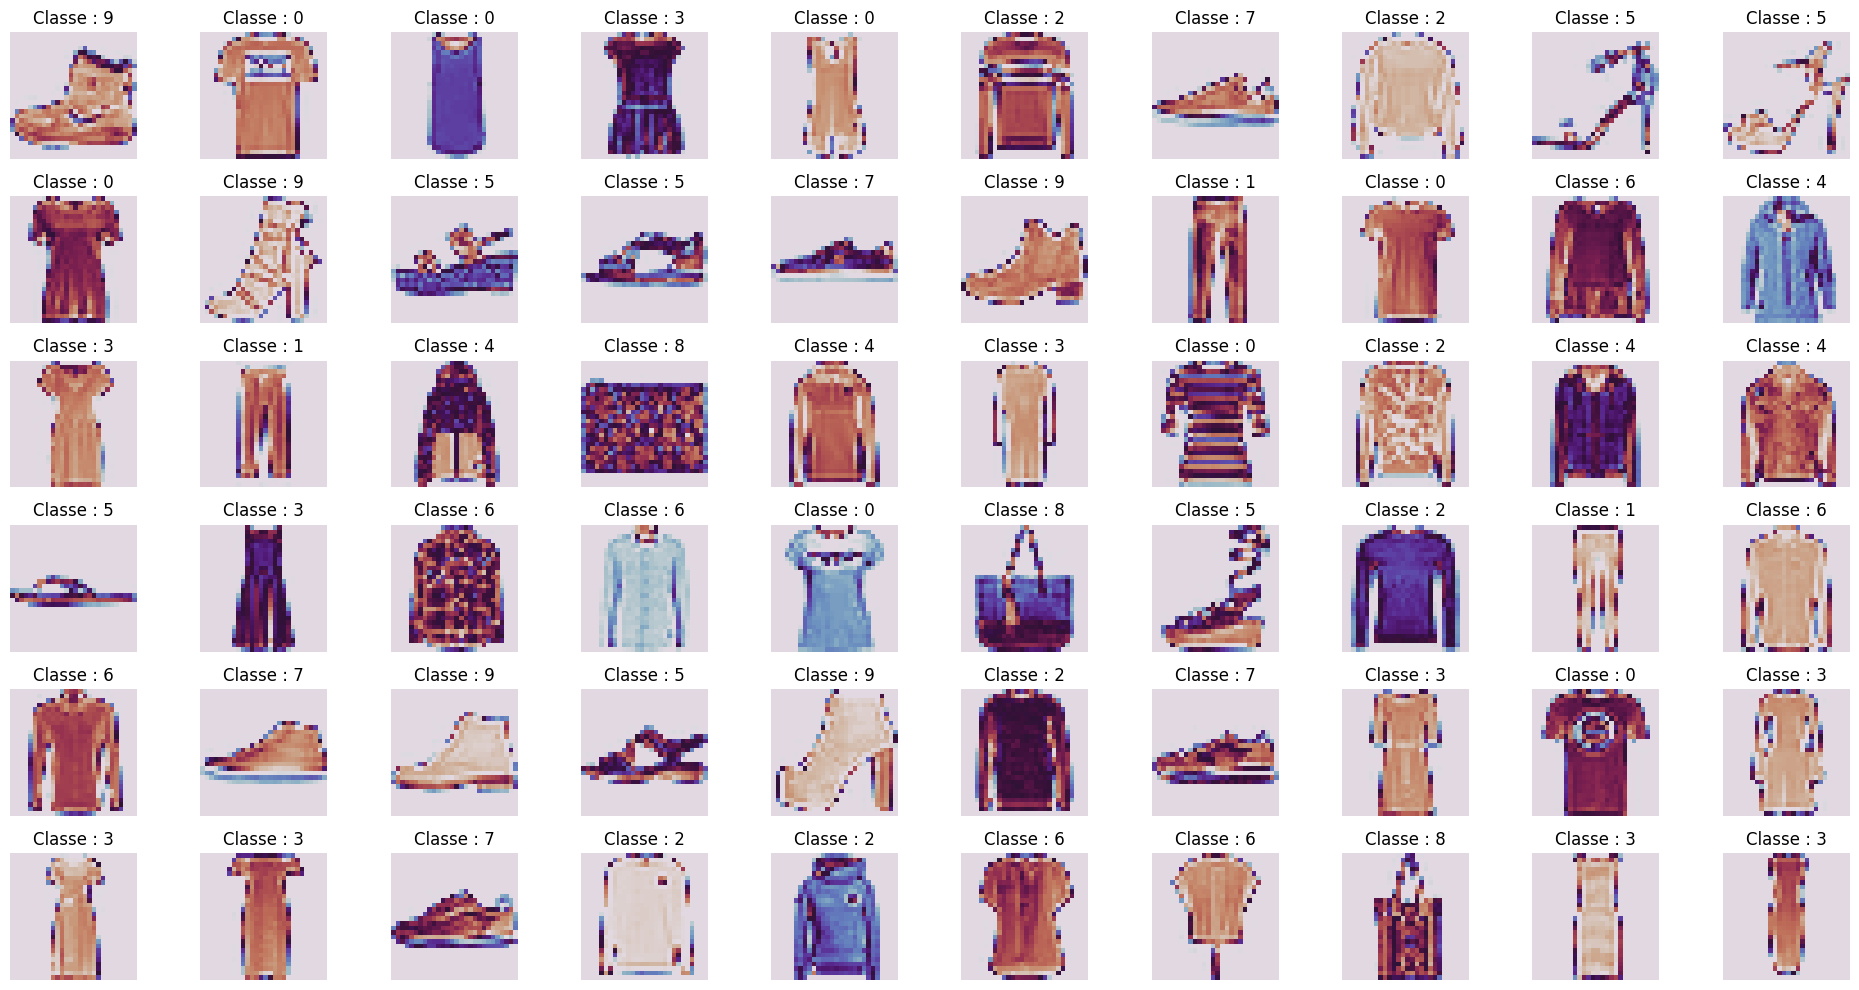

In [39]:
# Display 60 Images
plt.figure(figsize=(20,10))
for i in range(60):
  plt.subplot(6,10,i+1)
  plt.imshow(x_train[i],cmap='twilight')
  plt.title(f"Classe : {y_train[i]}")
  plt.grid(False)
  plt.axis('off')
  plt.tight_layout()
plt.show()


In [40]:
#Add name foreach Classe
Class_Names = {0:'T-shirt',1:'Srwal',2:'Trico',3:'Dress',4:'Jacket',5:'Sandal',6:'9amija',7:'Sprdila_Normal',8:'Sac',9:'Jordan'}


In [41]:
#Normaliser les pixels (diviser par 255 → valeurs dans [0,1])
x_train = x_train / 255
x_test = x_test / 255

In [42]:
# Build Model

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# EarlyStoping
Early_Stoping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

model.fit(x_train,y_train,epochs=100,validation_split=0.2,callbacks=[Early_Stoping])
Loss,acc = model.evaluate(x_test,y_test)

LOSS,acc = model.evaluate(x_test,y_test)

print(f"Loss: {Loss}")
print(f"Accuracy: {acc}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7713 - loss: 0.6525 - val_accuracy: 0.8261 - val_loss: 0.4724
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8538 - loss: 0.4073 - val_accuracy: 0.8633 - val_loss: 0.3863
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8702 - loss: 0.3564 - val_accuracy: 0.8602 - val_loss: 0.3787
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8800 - loss: 0.3228 - val_accuracy: 0.8721 - val_loss: 0.3597
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8878 - loss: 0.3078 - val_accuracy: 0.8773 - val_loss: 0.3403
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8921 - loss: 0.2878 - val_accuracy: 0.8808 - val_loss: 0.3374
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8976 - loss: 0.2770 - val_accuracy: 0.8713 - val_loss: 0.3501
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9022 - loss: 

In [108]:
# Définir le Pipeline de Classification d'Images (ViT) ---
from transformers import pipeline
from PIL import Image
def Model_existing_Pred(image_number):

  classifier_hf = pipeline(
      "image-classification",
      model="farleyknight-org-username/vit-base-mnist"
  )

  img_pil_28x28 = Image.fromarray(x_train[image_number], mode='L')
  img_pil_224x224 = img_pil_28x28.convert('RGB').resize((224, 224), Image.Resampling.LANCZOS)


  print("+"*150)
  for i in Class_Names:
    if i == y_train[image_number]:
      class_nam = Class_Names[i]
  print(f"Image originale class is : {class_nam}")

  results = classifier_hf(img_pil_28x28)

  for result in results[:1]:
      label = result['label'].split(',')[0].strip()
      score = result['score']
      print("-"*150)

  Label_Name = Class_Names[y_train[image_number]]

  print(f"Étiquette: {Label_Name}, Confiance: {score:.4f}")

# Déclaration Function
Model_existing_Pred(0)

Device set to use cpu
/tmp/ipython-input-717084256.py:11: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img_pil_28x28 = Image.fromarray(x_train[image_number], mode='L')


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Image originale class is : Jordan
------------------------------------------------------------------------------------------------------------------------------------------------------
Étiquette: Jordan, Confiance: 0.3765
